# (PSL) Coding Assignment 2

## Part I: Implement Lasso

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [34]:
myData = pd.read_csv("data/Coding2_Data.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()

In [35]:
X.shape, len(y)

((506, 13), 506)

### CD for Lasso

In [36]:
def one_var_lasso(r, z, lam):
    
    #################
    # Your CODE
    #################
    
    a = (np.transpose(r) @ z)/(np.sum(np.square(z)))
    
    lam_new = (2*r.shape[0]*lam)/(np.sum(np.square(z)))
    
    if (a > lam_new/2):
        return a - lam_new/2
    elif (np.abs(a) <= lam_new/2):
        return 0
    elif(a < -lam_new/2):
        return a + lam_new/2
    else:
        return None
    

In [37]:
def standardize(X):
    return (X - np.mean(X))/np.std(X) #, center

In [38]:
def MyLasso(X, y, lam_seq, maxit = 100):
    
    # Input
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda 
    
    # Output
    # B: a (p+1)-by-len(lam.seq) coefficient matrix 
    #    with the first row being the intercept sequence 

  
    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))
    
    ##############################
    # YOUR CODE: 
    # (1) newX = Standardized X; 
    # (2) Record the centers and scales used in (1) 
    ##############################
    
#     newX = np.apply_along_axis(standardize, 0, X)
#     centers = np.mean(X,axis=0)
#     std_devs = np.std(X,axis=0)
    
######################################

    newX = np.zeros(X.shape)
    scales = np.zeros(1)
    means = []
    
    centers = np.mean(X,axis=0)
    std_devs = np.std(X,axis=0)
    
    for i in range(p):
        newX[:,i] =  (X[:,i] - centers[i])/std_devs[i]
        means.append(np.mean(X[:,i]))
    
######################################


    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y

    
    # Triple nested loop
    for m in range(nlam):
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(-1,1)
                r = r + X_j * b[j]
                b[j] = one_var_lasso(r, X_j, lam_seq[m])
                r = r - X_j * b[j]
        B[1:, m] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[, 1]
    ##############################
   
    for i in range(p):
        B[i+1,:] = (B[i+1,:] / std_devs[i]) 


    B[0,:] = np.mean(y) - (centers @ B[1:,:])

    
    return(B)

In [39]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

(-8.35, -0.6499999999999999, -0.30999458351285647, 0.49974219884805277)

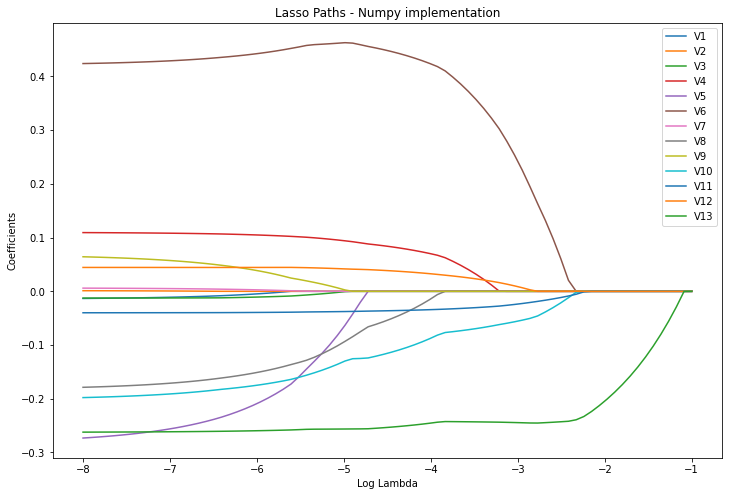

In [40]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

### Check the Accuracy

Compare the accuracy of your algorithm against the output from glmnet. The maximum difference between the two coefficient matrices should be less than 0.005.

In [41]:
lasso_coef = pd.read_csv("data/Coding2_lasso_coefs.csv").to_numpy()
lasso_coef.shape

(14, 80)

(-8.35, -0.6499999999999999, -0.308843688719263, 0.49920481030861696)

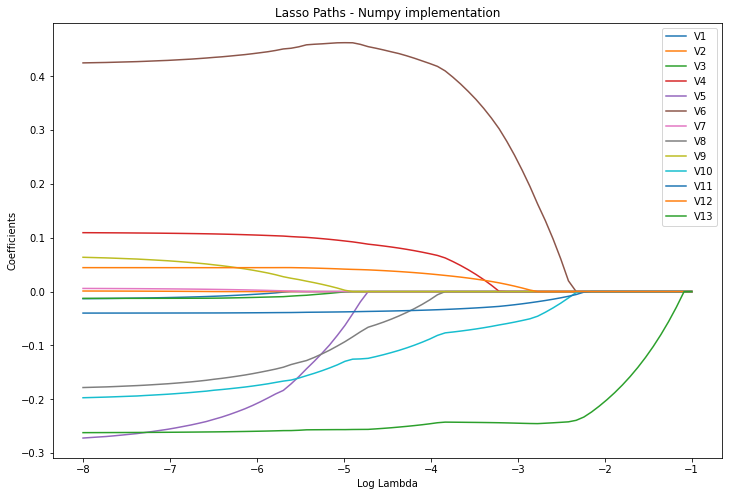

In [42]:
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, lasso_coef[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [43]:
abs(myout - lasso_coef).max()

0.004645317415904238

In [44]:
print(lasso_coef[0])

[3.03451287 3.03526058 3.13419906 3.224748   3.30761882 3.38346258
 3.45287514 3.51640183 3.57454176 3.62775169 3.67644966 3.72101827
 3.76180767 3.79913832 3.83340673 3.87429587 3.91381812 3.90589479
 3.89883334 3.89237139 3.88679083 3.84878634 3.80202818 3.75840301
 3.71846457 3.68202949 3.65352038 3.62749709 3.60368223 3.58245745
 3.5624735  3.54417257 3.52742326 3.54639886 3.59064823 3.62952976
 3.66427418 3.69604635 3.72512493 3.75246817 3.77684495 3.79907346
 3.8194157  3.81548045 3.8098448  3.82690168 3.85833056 3.88719763
 3.91401864 3.93833216 3.96077467 3.98512467 4.00459848 4.01173776
 4.02416922 4.03591855 4.04554626 4.05475778 4.06330791 4.07049326
 4.07757029 4.08420651 4.0896737  4.09764765 4.10351642 4.10960399
 4.114632   4.11960423 4.12436593 4.1281532  4.13187026 4.13547737
 4.13956112 4.14176066 4.14415675 4.14658689 4.14896269 4.15089543
 4.15272625 4.15448641]


In [21]:
print(myout[0])

[3.03451287 3.03526058 3.13419906 3.224748   3.30761882 3.38346258
 3.45287514 3.51640183 3.57454176 3.62775169 3.67644966 3.72101827
 3.76180767 3.79913832 3.83340742 3.87475003 3.91330865 3.90561927
 3.8985819  3.89214128 3.88624679 3.84880184 3.80119793 3.7576306
 3.71775759 3.68147769 3.65308554 3.62710091 3.60331965 3.58155494
 3.56163578 3.54340566 3.52672138 3.54751978 3.58919274 3.62733202
 3.66223728 3.69418272 3.72341934 3.75017684 3.77466542 3.79707748
 3.8175891  3.81552914 3.80978306 3.82694568 3.85870554 3.88777231
 3.91437435 3.93872066 3.96143103 3.98302957 4.00279666 4.01597025
 4.02783672 4.03869697 4.04863631 4.05773285 4.06605804 4.07367729
 4.08065047 4.08703235 4.09431901 4.1013193  4.10772599 4.11358942
 4.11895566 4.12386687 4.12836164 4.13247526 4.13624007 4.13968564
 4.14283905 4.14572506 4.14836635 4.15078367 4.15299601 4.15502075
 4.15687381 4.15856974]
